In [52]:
import numpy as np
import pandas as pd

h1, h2, h3 = [0.1, 0.05, 0.025]
eps = 0.0001

def f(t, y):
    return 2*t*y

def f_solve(t):
    return np.exp(t*t)

def method1(stepsize):
    y = 1.0
    num_result, real_result = [], []

    num_result.append(y + stepsize*f(0.0, y))    
    
    for i in np.arange(0, 1, stepsize):
        y_k = y + stepsize*f(i, y)
    
        while True:
            y_k1 = y + stepsize*f(i+stepsize, y_k)
            if abs(y_k1-y_k) < eps:
                break
            y_k = y_k1
            
        y_n1 = y + stepsize*f(i+stepsize, y_k1)
        num_result.append(y_n1)
        y = y_n1

    grid = np.arange(0, 1, stepsize)

    for i in grid:
        y_new_real = f_solve(i)
        real_result.append(y_new_real)
    
    real_result.append(f_solve(1))
    
    error = np.absolute(np.array(num_result) - np.array(real_result))
    
    error_scientific = []
    for x in error:
        error_scientific.append('{:.2e}'.format(x))
    
    df = pd.DataFrame([grid, real_result, num_result, error_scientific]).T
    df.columns = ['t', 'y_real', 'y_num', '|y_num-y_real|']
    df['t'].iloc[-1] = 1.0
    df
    
    return df

def method2(stepsize):    
    y = 1.0
    num_result, real_result = [], []

    num_result.append(y + stepsize*f(0.0, y))
    
    for i in np.arange(0, 1, stepsize):
        y_k = y + stepsize*f(i, y)
    
        while True:
            y_k1 = y + stepsize*f(i+stepsize, y_k)
            if abs(y_k1-y_k) < eps:
                break
            y_k = y_k1
        y_n1 = y + (stepsize/2.0)*(f(i, y)+f(i+stepsize, y_k1))
        num_result.append(y_n1)
        y = y_n1

    grid = np.arange(0, 1, stepsize)

    for i in grid:
        y_new_real = f_solve(i)
        real_result.append(y_new_real)
    
    real_result.append(f_solve(1))
    
    error = np.absolute(np.array(num_result) - np.array(real_result))
    
    error_scientific = []
    for x in error:
        error_scientific.append('{:.2e}'.format(x))
    
    df = pd.DataFrame([grid, real_result, num_result, error_scientific]).T
    df.columns = ['t', 'y_real', 'y_num', '|y_num-y_real|']
    df['t'].iloc[-1] = 1.0
    df
    
    return df

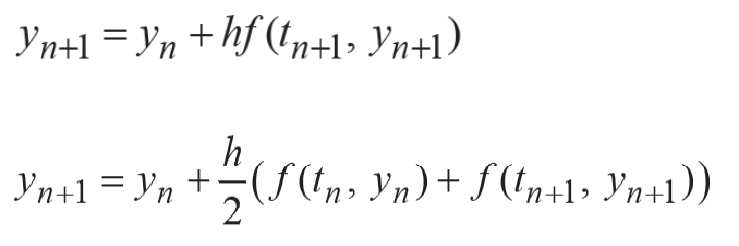

In [53]:
m1h1 = method1(h1)
m1h1

,t,y_real,y_num,|y_num-y_real|
0,0.0,1.0,1.0,0.00e+00
1,0.1,1.01005,1.020408,1.04e-02
2,0.2,1.040811,1.062925,2.21e-02
3,0.3,1.094174,1.130771,3.66e-02
4,0.4,1.173511,1.229099,5.56e-02
5,0.5,1.284025,1.365665,8.16e-02
6,0.6,1.433329,1.551891,1.19e-01
7,0.7,1.632316,1.804524,1.72e-01
8,0.8,1.896481,2.148241,2.52e-01
9,0.9,2.247908,2.619805,3.72e-01


In [54]:
m1h2 = method1(h2)
m1h2

,t,y_real,y_num,|y_num-y_real|
0,0.0,1.0,1.0,0.00e+00
1,0.05,1.002503,1.005025,2.52e-03
2,0.1,1.01005,1.015177,5.13e-03
3,0.15,1.022755,1.030636,7.88e-03
4,0.2,1.040811,1.05167,1.09e-02
5,0.25,1.064494,1.078636,1.41e-02
6,0.3,1.094174,1.111996,1.78e-02
7,0.35,1.130319,1.152327,2.20e-02
8,0.4,1.173511,1.200341,2.68e-02
9,0.45,1.22446,1.256901,3.24e-02


In [55]:
m1h3 = method1(h3)
m1h3

,t,y_real,y_num,|y_num-y_real|
0,0.0,1.0,1.0,0.00e+00
1,0.025,1.000625,1.001252,6.26e-04
2,0.05,1.002503,1.003761,1.26e-03
3,0.075,1.005641,1.007539,1.90e-03
4,0.1,1.01005,1.012602,2.55e-03
5,0.125,1.015748,1.018971,3.22e-03
6,0.15,1.022755,1.026671,3.92e-03
7,0.175,1.031099,1.035734,4.63e-03
8,0.2,1.040811,1.046195,5.38e-03
9,0.225,1.051928,1.058099,6.17e-03


In [56]:
m2h1 = method2(h1)
m2h1

,t,y_real,y_num,|y_num-y_real|
0,0.0,1.0,1.0,0.00e+00
1,0.1,1.01005,1.010204,1.54e-04
2,0.2,1.040811,1.041352,5.41e-04
3,0.3,1.094174,1.095414,1.24e-03
4,0.4,1.173511,1.175903,2.39e-03
5,0.5,1.284025,1.288266,4.24e-03
6,0.6,1.433329,1.440515,7.19e-03
7,0.7,1.632316,1.644197,1.19e-02
8,0.8,1.896481,1.915881,1.94e-02
9,0.9,2.247908,2.279429,3.15e-02


In [57]:
m2h2 = method2(h2)
m2h2

,t,y_real,y_num,|y_num-y_real|
0,0.0,1.0,1.0,0.00e+00
1,0.05,1.002503,1.002513,9.43e-06
2,0.1,1.01005,1.010082,3.19e-05
3,0.15,1.022755,1.022823,6.84e-05
4,0.2,1.040811,1.040932,1.21e-04
5,0.25,1.064494,1.064686,1.92e-04
6,0.3,1.094174,1.094459,2.85e-04
7,0.35,1.130319,1.130724,4.04e-04
8,0.4,1.173511,1.174068,5.57e-04
9,0.45,1.22446,1.225211,7.50e-04


In [58]:
m2h3 = method2(h3)
m2h3

,t,y_real,y_num,|y_num-y_real|
0,0.0,1.0,1.0,0.00e+00
1,0.025,1.000625,1.000626,5.87e-07
2,0.05,1.002503,1.002505,1.96e-06
3,0.075,1.005641,1.005645,4.14e-06
4,0.1,1.01005,1.010057,7.16e-06
5,0.125,1.015748,1.015759,1.10e-05
6,0.15,1.022755,1.022771,1.58e-05
7,0.175,1.031099,1.03112,2.16e-05
8,0.2,1.040811,1.040839,2.84e-05
9,0.225,1.051928,1.051965,3.64e-05
